In [180]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
import numpy as np

In [181]:
# Identity gates for all intensities are optional
def initialize(circuit, intensity, idx):
    for i in range(intensity.size):
        circuit.i(i)

    for i in range(idx.size):
        circuit.h(intensity.size+i)

    circuit.barrier()

In [182]:
def combinePosIntensity(circuit, qubits):
    for i in range(qubits):
        circuit.i(i)

    circuit.barrier()

In [183]:
def encodeGreyScalePixels(value, idx_qubit, circuit, num_qubits):
    
    if (value != len(value) * value[0]):
        circuit.x(num_qubits-idx_qubit)

    for idx, bit_value in enumerate(reversed(value)):
        if (bit_value == '1'):
            circuit.ccx(num_qubits-1, num_qubits-2, idx)

    if (value != len(value) * value[0]):
        circuit.x(num_qubits-idx_qubit)

    circuit.barrier()

In [184]:
def measureCircuit(circuit, qubits):
    circuit.measure(range(qubits),range(qubits))

In [185]:
def createNEQR(pixel_pos, pos_name, intensity_val, intensity_name, classical_bit, clasical_name):
    # Pixel position
    idx = QuantumRegister(pixel_pos, pos_name)
    # grayscale pixel intensity value
    intensity = QuantumRegister(intensity_val,intensity_name)
    # classical register
    cr = ClassicalRegister(classical_bit, clasical_name)

    circuit = QuantumCircuit(intensity, idx, cr)

    # set the total number of qubits
    num_qubits = circuit.num_qubits

    return circuit, idx, intensity, num_qubits

Ten qubits are utilized, eight for intensity of pixel values and two for pixel positions (labeled idx)

In [186]:
circuit, idx, intensity, num_qubits = createNEQR(2, 'idx', 8, 'intensity', 10, 'cr')


/var/folders/8b/9xj_42b90vx1qvx26pq56qgw0000gn/T/ipykernel_36553/2169220258.py:4: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.i()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.id as direct replacement.
  circuit.i(i)
/var/folders/8b/9xj_42b90vx1qvx26pq56qgw0000gn/T/ipykernel_36553/1963253760.py:3: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.i()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.id as direct replacement.
  circuit.i(i)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style=

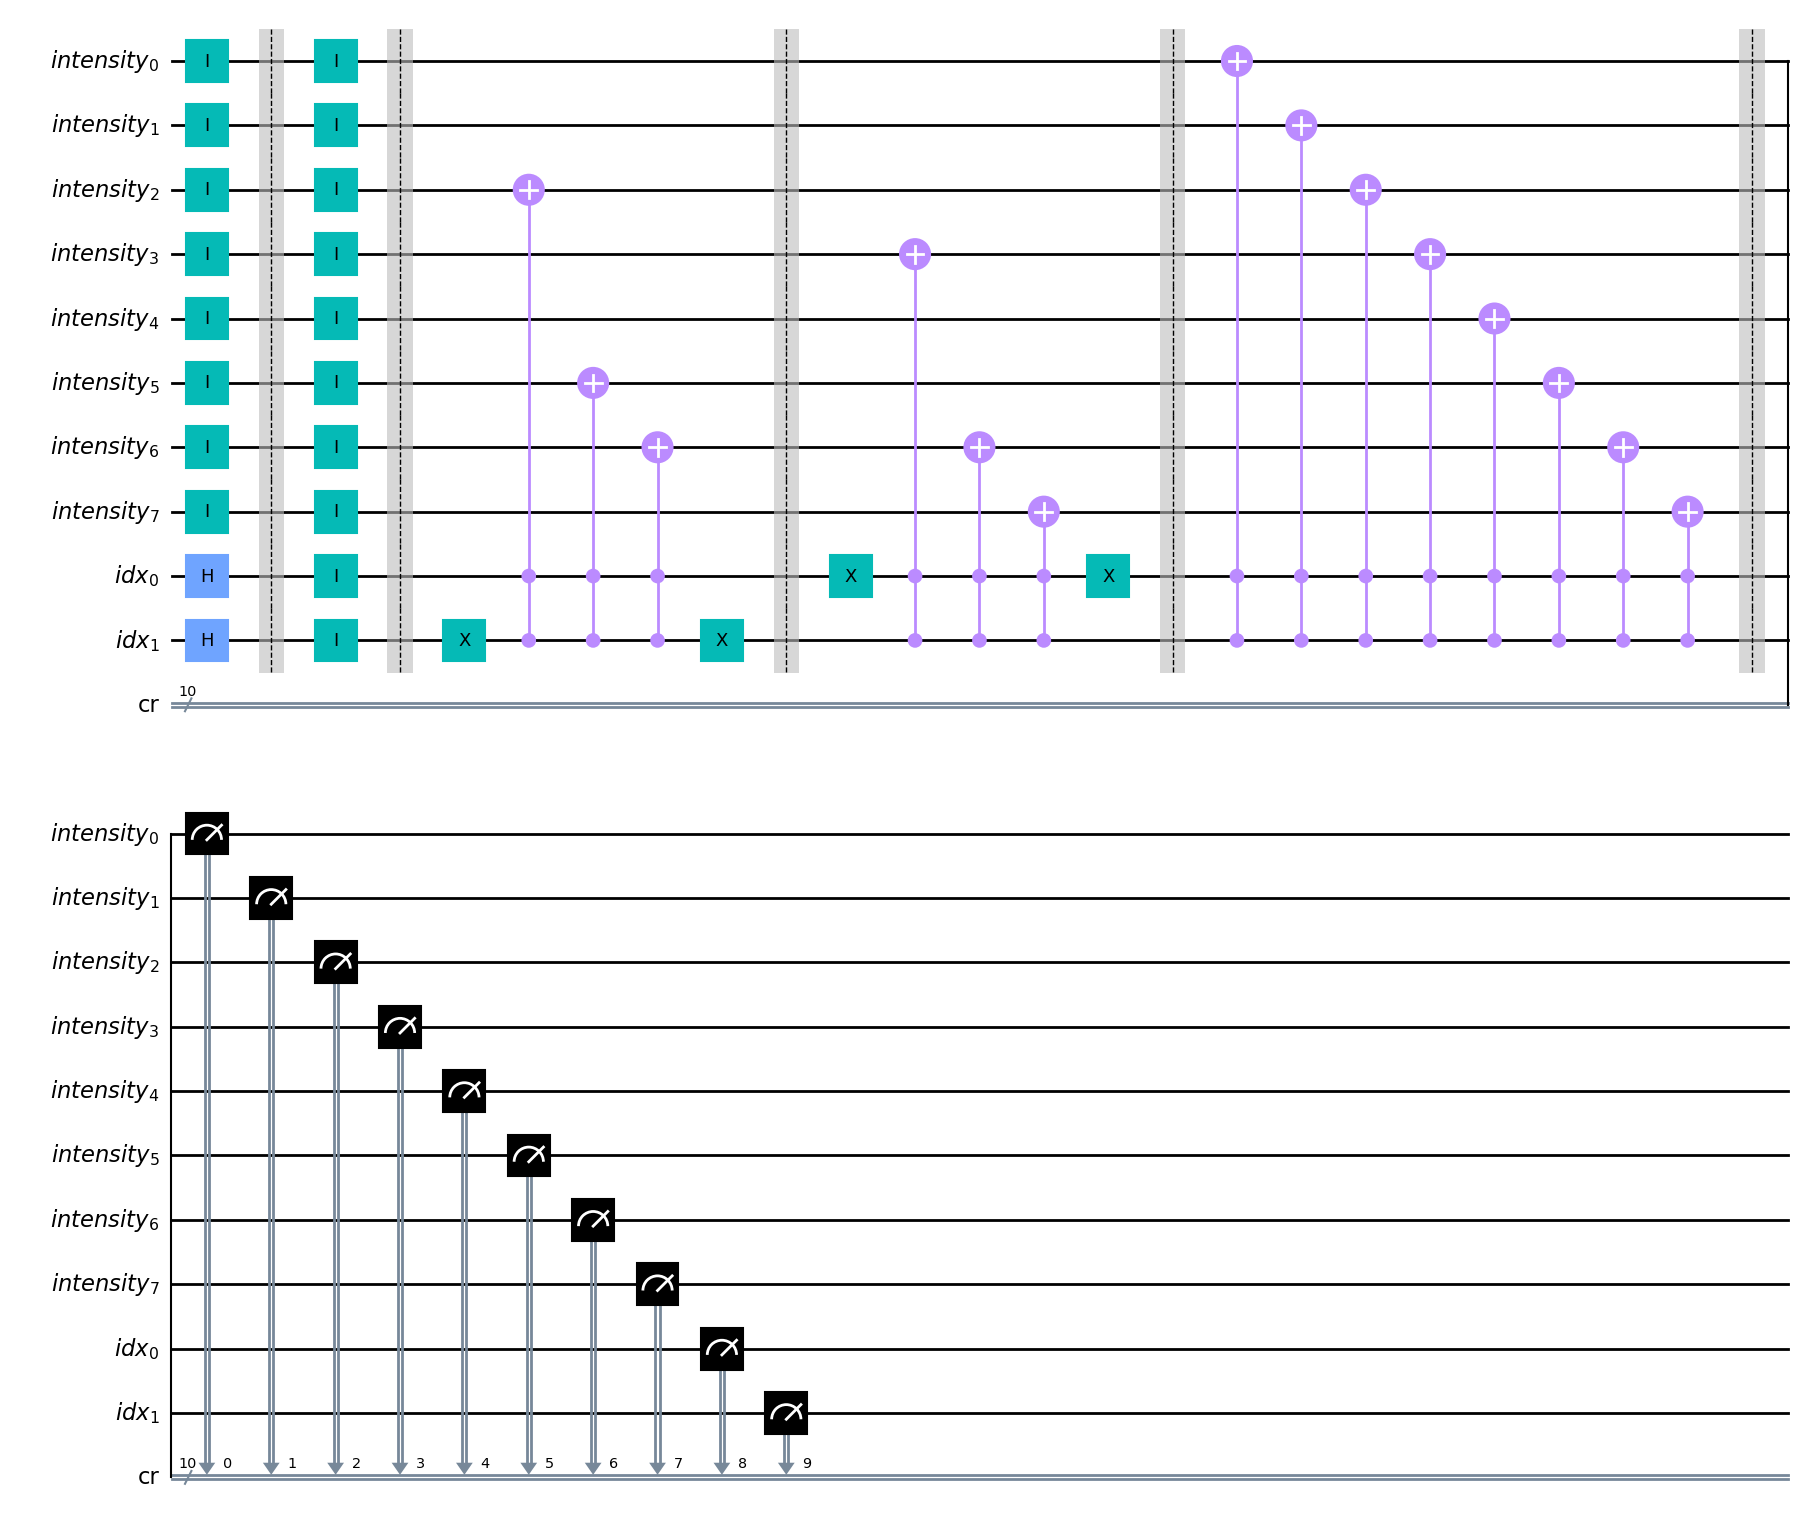

In [187]:
initialize(circuit, intensity, idx)
combinePosIntensity(circuit, num_qubits)


encodeGreyScalePixels('01100100', 1, circuit, num_qubits)
encodeGreyScalePixels('11001000', 2, circuit, num_qubits)
encodeGreyScalePixels('11111111', 1, circuit, num_qubits)

measureCircuit(circuit, num_qubits)

circuit.draw(output="mpl")